# Base Ball case study

# This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.

There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [199]:
data=pd.read_csv('baseball_case_study.csv')

In [200]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [201]:
df=pd.DataFrame(data)

In [202]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


There are in total 17 features, the output(target) is to predict number of wins (W) which is continuous in nature so it is a regression problem.

There are in total 29 records in the dataset.

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


From the above information it can be said that there are no null values in the dataset and datatypes    of all the features except ERA feature is having int64 datatype.

The ERA feature is having float datatype.

In [204]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

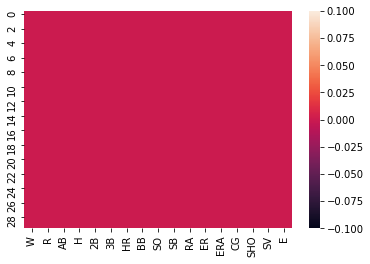

In [205]:
sns.heatmap(df.isnull())

In [206]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


From the above description it is observed there are outliers present in R feature as the hugh difference between 75% and max values.Further, the same is observed in ERA feature, SHO feature and Error feature.

The features AB,H,3B,HR,SV,E and CG are having right tailed skewness as mean is greater than median.

The features 2B,BB,SO,RA,ER,ERA,SHO are having left tailed skewness as median is greater than mean.

# Checking out the data distribution using distplot

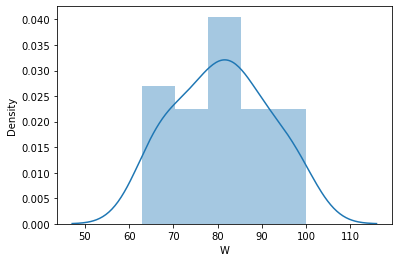

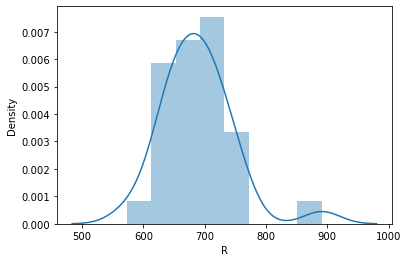

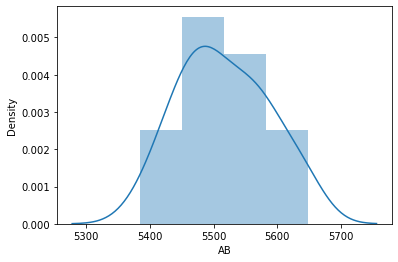

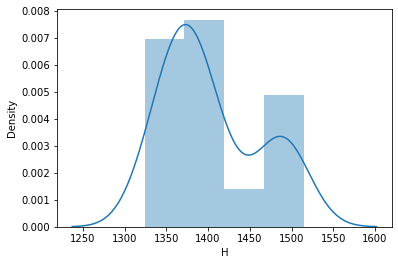

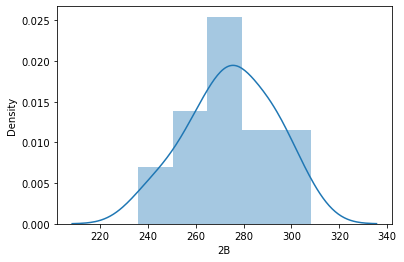

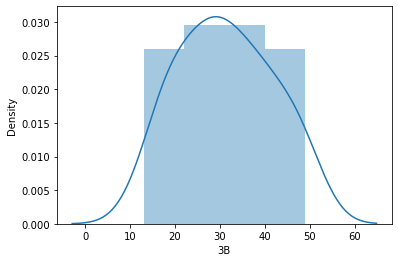

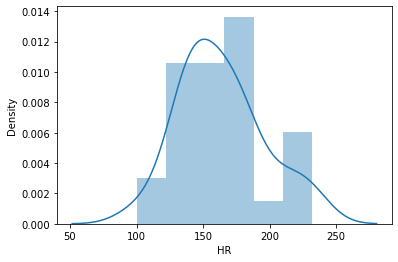

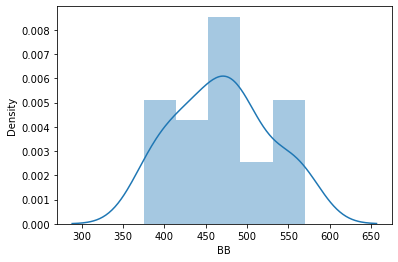

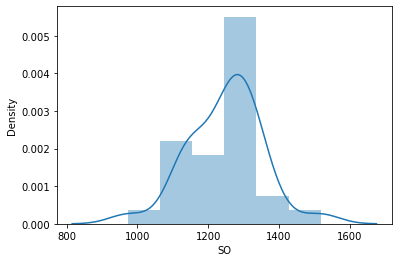

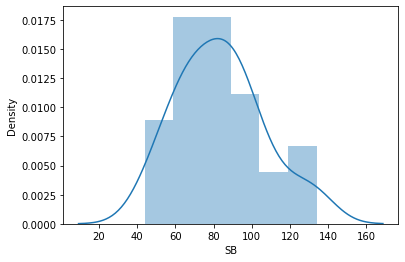

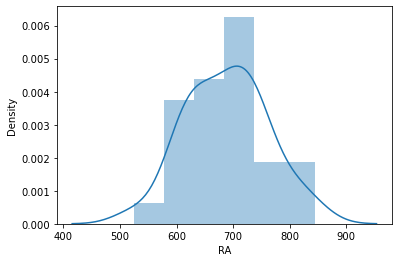

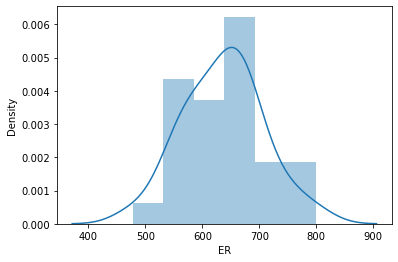

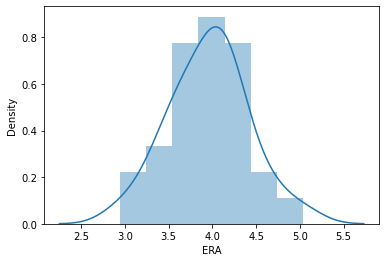

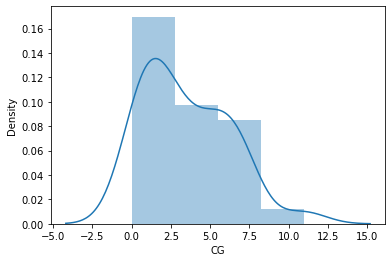

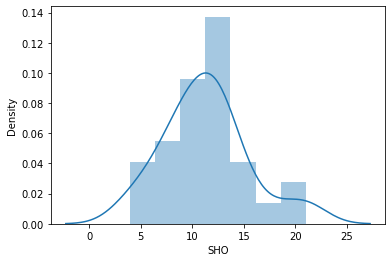

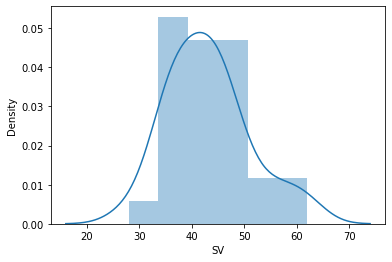

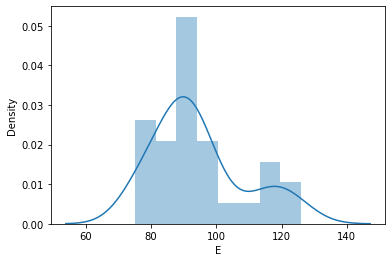

In [207]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])
    plt.show()

# Checking out for outliers using boxplot

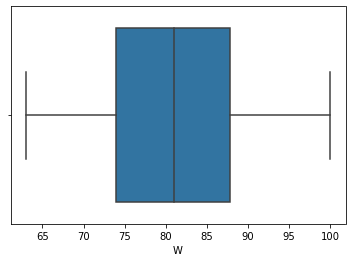

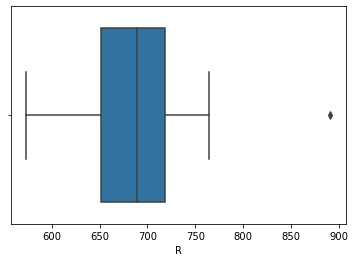

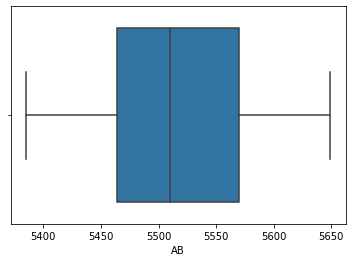

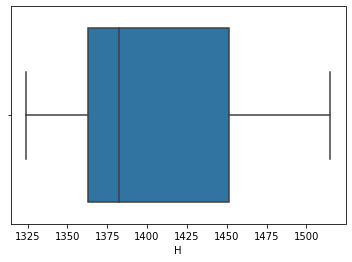

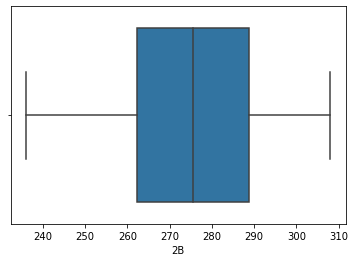

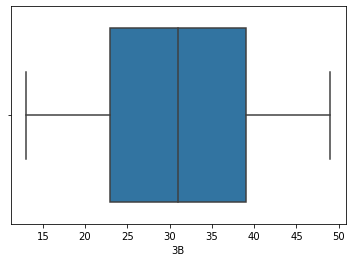

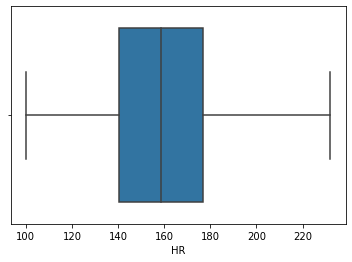

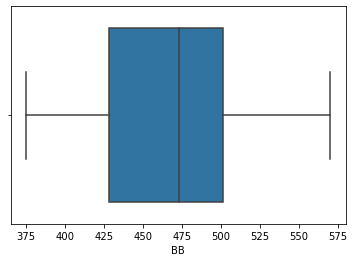

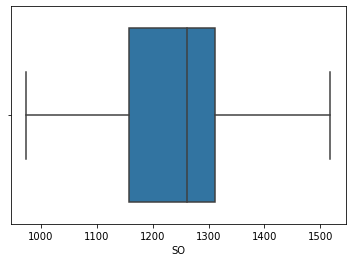

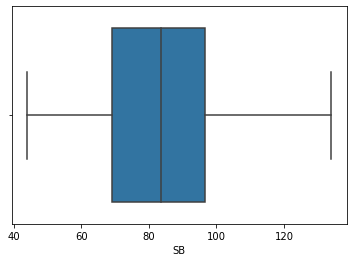

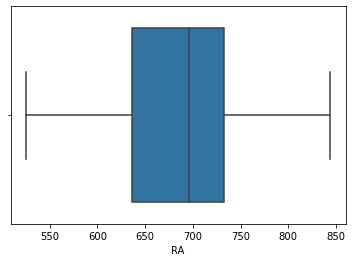

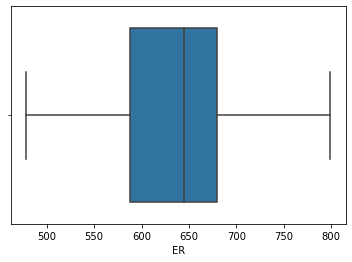

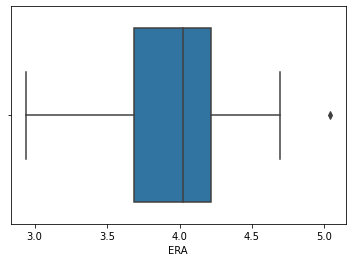

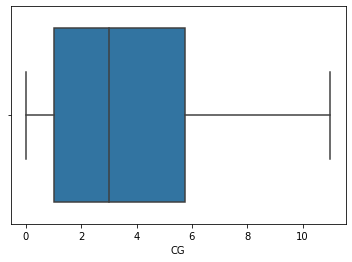

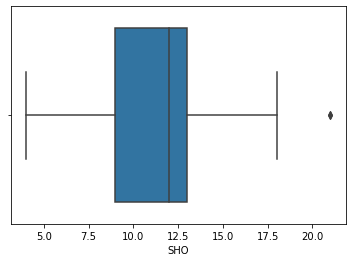

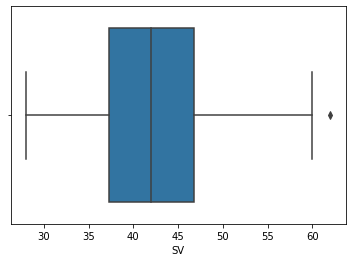

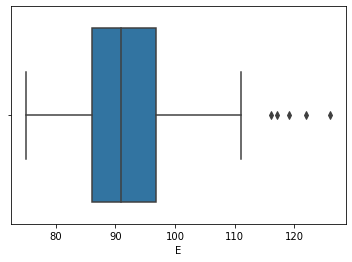

In [208]:
for j in df.columns:
    plt.figure()
    sns.boxplot(df[j])
    plt.show()

There are outliers present in R feature, ERA feature, SHO feature and E feature.

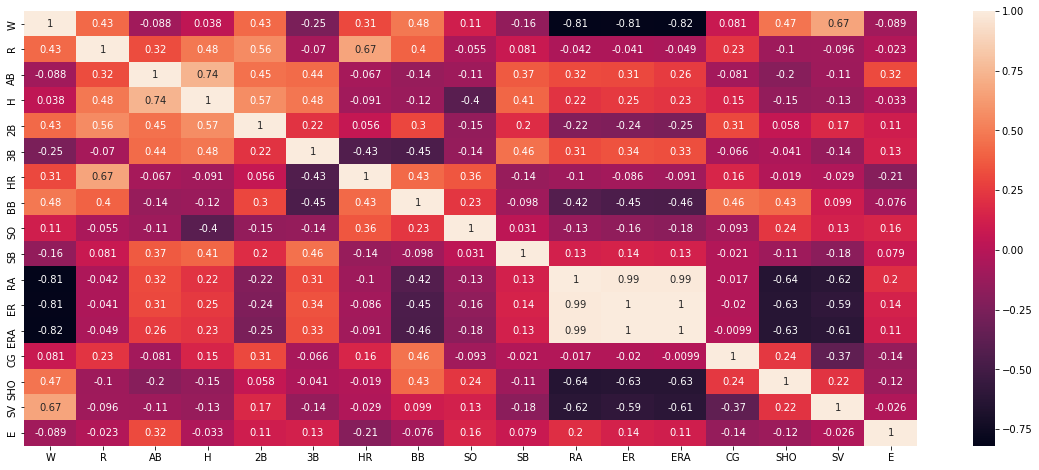

In [209]:
plt.figure(figsize=[20,8])
sns.heatmap(df.corr(),annot=True)
plt.show()

From the above heatmap it can be said that features AB,3B,SB,E are having very less negative correlation with the output label W.

While features RA,ER and ERA are highly negatively correlated with the output label W.

Text(0.5, 1.0, 'Distribution of Wins')

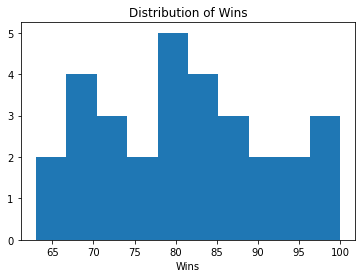

In [210]:
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

In [211]:
df['W'].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

With 68 no of wins there are three teams.
With 100 no of wins there is only one team.
There are 7 teams in the range of 80 to 85 no of wins.



<AxesSubplot:xlabel='R', ylabel='W'>

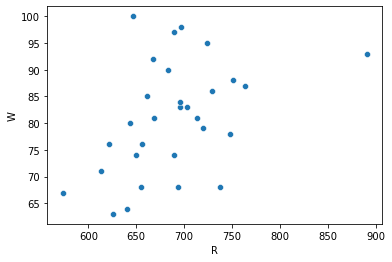

In [212]:
sns.scatterplot(x='R',y='W',data=df)

From the above scatterplot there is a linear relationship between R feature and W feature. Further, in most of the cases as the runs increases the no of wins also increases.

<AxesSubplot:xlabel='AB', ylabel='W'>

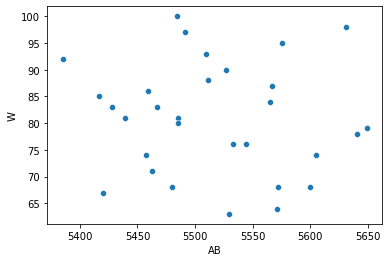

In [213]:
sns.scatterplot(x='AB',y='W',data=df)

There is no clear relation established between feature AB and feature W.

<AxesSubplot:xlabel='H', ylabel='W'>

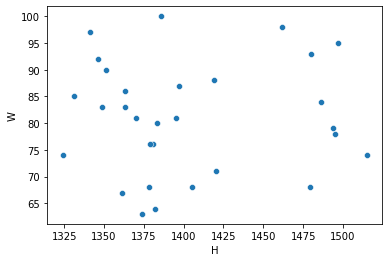

In [214]:
sns.scatterplot(x='H',y='W',data=df)

There is no clear relation established between feature H and feature W.

<AxesSubplot:xlabel='2B', ylabel='W'>

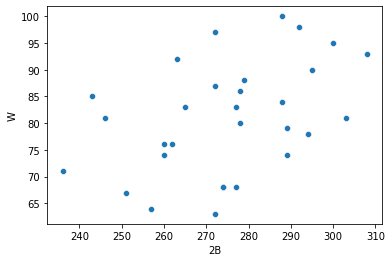

In [215]:
sns.scatterplot(x='2B',y='W',data=df)

There is a positive linear relationship between W and 2B.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a3af664580>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a3af6643d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a3af664430>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a3af6647f0>}

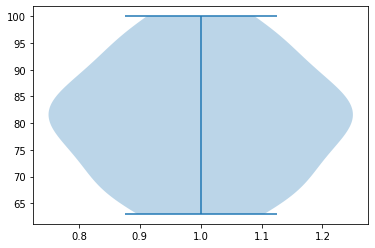

In [216]:
plt.violinplot(df['W'])

The high density area where most of the data is lying is in range of 75 to 88 approx for feature W.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a3afa993d0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a3afa99220>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a3afa99280>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a3afa99640>}

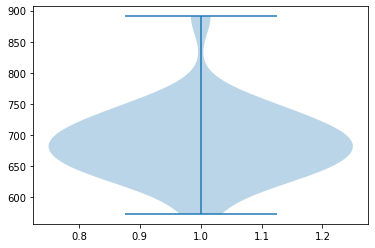

In [217]:
plt.violinplot(df['R'])

In [218]:
df['R'].value_counts()

696    2
689    2
703    1
669    1
644    1
720    1
647    1
713    1
650    1
655    1
656    1
724    1
661    1
729    1
667    1
737    1
573    1
613    1
683    1
748    1
622    1
751    1
626    1
694    1
697    1
891    1
764    1
640    1
Name: R, dtype: int64

The minimum runs scored by one team is 573 and maximum runs scored by another team is 891.
There are two teams scoring 689 runs and similarly there are two teams scoring 696 runs.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a3af740100>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a3af735f10>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a3af7405b0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a3af740370>}

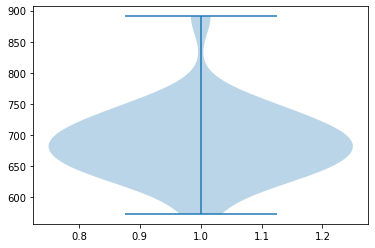

In [219]:
plt.violinplot(df['R'])

The high density area where most of the data is lying is in range of 650 to 730 approx for feature R.

In [220]:
df['AB'].value_counts()

5485    2
5631    1
5467    1
5572    1
5509    1
5575    1
5640    1
5385    1
5567    1
5511    1
5649    1
5459    1
5480    1
5463    1
5529    1
5533    1
5565    1
5439    1
5600    1
5527    1
5605    1
5544    1
5417    1
5484    1
5420    1
5491    1
5428    1
5457    1
5571    1
Name: AB, dtype: int64

The minimum At Bats scored by one team is 5385 and maximum At bats runs scored by another team is 5649. . There are two teams having At score of 5485.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a3b0971c10>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a3b0971a60>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a3b096f370>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a3b0971e80>}

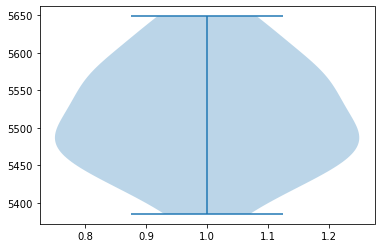

In [221]:
plt.violinplot(df['AB'])

The high density area where most of the data is lying is in range of 5450 to 5530 approx for feature AB.

In [222]:
df['H'].value_counts()

1363    2
1341    1
1497    1
1405    1
1349    1
1351    1
1480    1
1479    1
1419    1
1420    1
1486    1
1361    1
1494    1
1495    1
1370    1
1462    1
1374    1
1378    1
1379    1
1381    1
1382    1
1383    1
1386    1
1515    1
1324    1
1331    1
1395    1
1397    1
1346    1
Name: H, dtype: int64

The minimum hits scored by one team is 1324 and maximum hits scored by another team is 1515.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a3aff7e4f0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a3aff7e340>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a3aff7e3a0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a3aff7e760>}

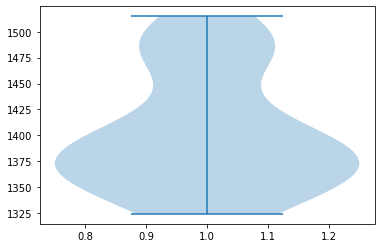

In [223]:
plt.violinplot(df['H'])

The high density area where most of the data is lying is in range of 1350 to 1400 approx for feature H.

In [224]:
df['2B'].value_counts()

272    3
288    2
278    2
289    2
277    2
260    2
274    2
251    1
236    1
294    1
295    1
262    1
265    1
257    1
263    1
292    1
303    1
243    1
308    1
246    1
279    1
300    1
Name: 2B, dtype: int64

The minimum doubles scored by a team is 236 and the maximum doubles scored by another team is 308.
There are three teams scoring 272 doubles.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a3af9581f0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a3af958f10>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a3af958bb0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a3af9586a0>}

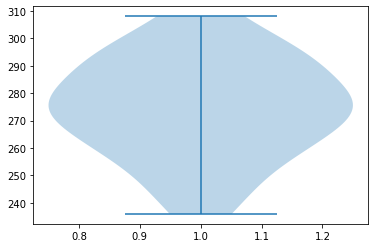

In [225]:
plt.violinplot(df['2B'])

The high density area where most of the data is lying is in range of 270 to 290 approx for feature 2B.

In [226]:
df['3B'].value_counts()

27    3
32    2
17    2
26    2
39    2
49    2
44    1
33    1
34    1
36    1
37    1
40    1
42    1
30    1
13    1
46    1
29    1
18    1
19    1
20    1
21    1
22    1
48    1
Name: 3B, dtype: int64

The minimum triples scored by a team is 13 and the maximum triples scored by another team is 49.
There are three teams scoring 27 triples.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a3b0837d60>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a3afea2ac0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a3b0171430>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a3b0164ac0>}

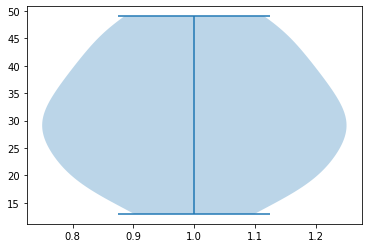

In [227]:
plt.violinplot(df['3B'])

The high density area where most of the data is lying is in range of 23 to 33  approx for feature 3B.

In [228]:
df['HR'].value_counts()

177    2
136    2
167    2
187    1
151    1
198    1
148    1
137    1
139    1
140    1
141    1
145    1
146    1
212    1
154    1
217    1
186    1
156    1
161    1
100    1
230    1
232    1
171    1
172    1
176    1
120    1
130    1
Name: HR, dtype: int64

The minimum homeruns scored by a team is 100 and the maximum homeruns scored by another team is 232.
There are two teams scoring 136 homeruns ,two another teams scoring 167 homeruns and two another teams scoring 177 home runs.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a3b010fd90>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a3af2d9580>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a3af550340>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a3afec5460>}

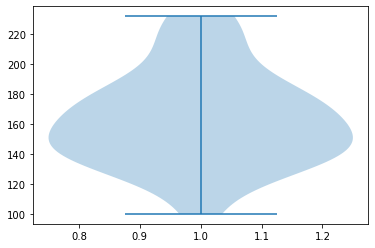

In [229]:
plt.violinplot(df['HR'])

The high density area where most of the data is lying is in range of 140 to 170 approx for feature HR.

In [230]:
df['BB'].value_counts()

478    2
570    1
471    1
490    1
439    1
455    1
388    1
457    1
461    1
375    1
426    1
435    1
404    1
533    1
383    1
539    1
475    1
412    1
418    1
486    1
488    1
554    1
496    1
563    1
436    1
567    1
503    1
506    1
387    1
Name: BB, dtype: int64

The minimum Walks scored by a team is 375 and the maximum walks scored by another team is 570.
There are two teams scoring 478 Walks.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a3b0058370>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a3b0058d90>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a3b0058a00>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a3b0058d00>}

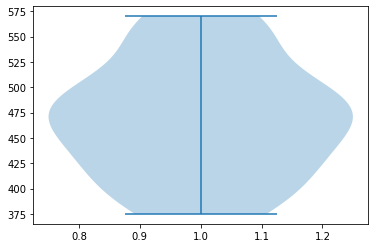

In [231]:
plt.violinplot(df['BB'])

The high density area where most of the data is lying is in range of 450 to 500 approx for feature BB.

In [232]:
df['SO'].value_counts()

1150    2
1151    1
1119    1
1267    1
1283    1
1157    1
1159    1
1290    1
1227    1
973     1
1299    1
1231    1
1233    1
1107    1
1310    1
1312    1
1255    1
1322    1
1259    1
1264    1
1327    1
1392    1
1331    1
1258    1
1336    1
1274    1
1518    1
1148    1
1344    1
Name: SO, dtype: int64

The minimum strike out scored by a team is 973 and the maximum strike out scored by another team is 1518.
There are two teams scoring 1150 strike out.

In [233]:
df['SB'].value_counts()

69     3
88     2
63     1
93     1
132    1
70     1
71     1
78     1
82     1
83     1
84     1
86     1
87     1
95     1
59     1
97     1
98     1
101    1
134    1
104    1
44     1
68     1
112    1
51     1
52     1
57     1
121    1
Name: SB, dtype: int64

The minimum stolen bases scored by a team is 44 and the maximum stolen bases scored by another team is 134.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a3b0a6c430>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a3b0a6c130>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a3b01d3250>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a3b01d3f70>}

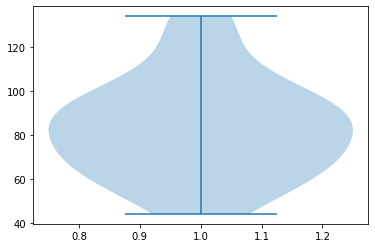

In [234]:
plt.violinplot(df['SB'])

The high density area where most of the data is lying is in range of 65 to 90  approx for feature SB.

In [235]:
df['RA'].value_counts()

701    1
700    1
641    1
642    1
713    1
844    1
525    1
595    1
596    1
726    1
729    1
731    1
733    1
670    1
608    1
737    1
803    1
613    1
678    1
809    1
618    1
675    1
753    1
754    1
627    1
693    1
760    1
698    1
635    1
640    1
Name: RA, dtype: int64

The minimum Runs Allowed,by a team is 525 and the maximum runs allowed  by another team is 844.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a3b05d3d60>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a3b09c7670>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a3b05d3280>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a3b05d3220>}

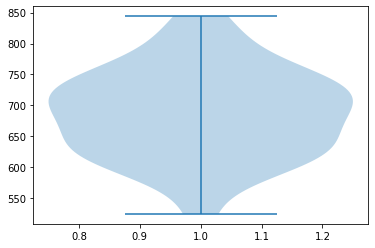

In [236]:
plt.violinplot(df['RA'])

The high density area where most of the data is lying is in range of 630 to 730 approx for feature RA.

In [237]:
df['ER'].value_counts()

638    1
572    1
643    1
646    1
584    1
652    1
653    1
655    1
659    1
532    1
597    1
664    1
601    1
557    1
604    1
694    1
478    1
799    1
609    1
546    1
677    1
680    1
553    1
746    1
749    1
682    1
700    1
630    1
698    1
577    1
Name: ER, dtype: int64

In [238]:
df['ER'].max()

799

The minimum Earned Runs scored by a team is 478 and the maximum earned runs scored by another team is 799.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a3b0734400>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a3b0734c40>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a3b07342b0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a3b0734af0>}

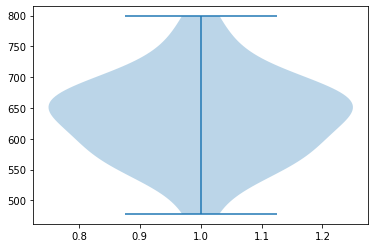

In [239]:
plt.violinplot(df['ER'])

The high density area where most of the data is lying is in range of 630 to 680  approx for feature ER.

In [240]:
df['ERA'].value_counts()

3.57    1
3.72    1
4.03    1
4.69    1
4.31    1
3.67    1
3.94    1
3.62    1
4.14    1
4.16    1
3.98    1
4.04    1
4.28    1
3.80    1
4.24    1
4.09    1
3.44    1
4.07    1
3.43    1
4.64    1
3.21    1
5.04    1
4.33    1
4.02    1
4.05    1
2.94    1
3.73    1
3.74    1
4.41    1
3.36    1
Name: ERA, dtype: int64

In [241]:
df['ERA'].max()

5.04

The minimum earned runs average  by a team is 2.94 and the maximum earned runs scored by another  team is 5.04.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a3b0528820>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a3b0528670>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a3b05286d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a3b0528cd0>}

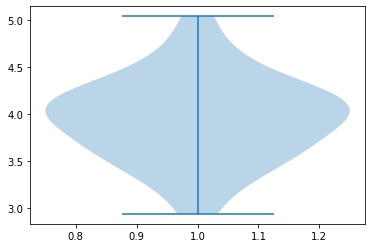

In [242]:
plt.violinplot(df['ERA'])

The high density area where most of the data is lying is in range of 3.8 to 4.3 approx for feature ERA.

In [243]:
df['SHO'].value_counts()

12    7
10    5
13    3
21    2
15    2
9     2
8     2
7     2
4     2
18    1
14    1
6     1
Name: SHO, dtype: int64

In [244]:
df['SHO'].max()

21

The minimum Shutouts by a team is 4 and the maximum Shutouts by another team is 21.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a3b064f3a0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a3b064f1f0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a3b064f250>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a3b064f850>}

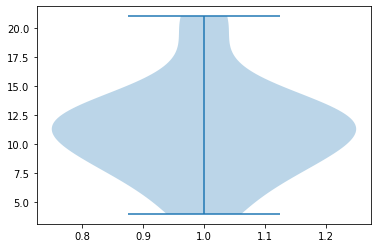

In [245]:
plt.violinplot(df['SHO'])

The high density area where most of the data is lying is in range of 9.8 to 12.5 approx for feature SHO.

In [246]:
df['SV'].value_counts()

35    4
45    3
41    3
44    2
48    2
40    2
43    1
36    1
37    1
38    1
39    1
28    1
62    1
46    1
47    1
50    1
54    1
56    1
60    1
34    1
Name: SV, dtype: int64

The minimum saves by a team is 28 and the maximum saves by another team is 62.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a3b06eb790>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a3b06eb5e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a3b06eb640>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a3b06ebc40>}

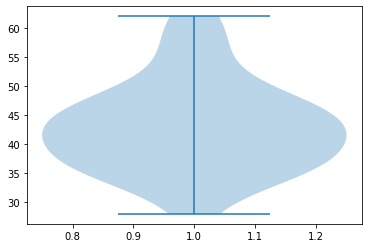

In [247]:
plt.violinplot(df['SV'])

The high density area where most of the data is lying is in range of 38 to 46 approx for feature SV.

In [248]:
df['E'].value_counts()

90     3
88     3
86     3
77     2
95     2
93     2
122    1
119    1
126    1
85     1
116    1
94     1
79     1
78     1
75     1
92     1
101    1
111    1
117    1
97     1
96     1
Name: E, dtype: int64

The minimum errors by a team is 75 and the maximum errors by another team is 126.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a3b0608b80>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a3b06089d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a3b076e070>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a3b076e370>}

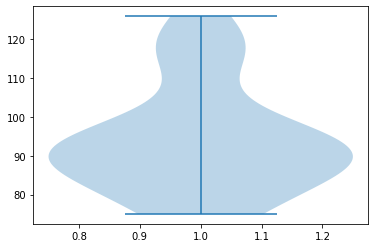

In [249]:
plt.violinplot(df['E'])

The high density area where most of the data is lying is in range of 83 to 94  approx for feature E.

<Figure size 1152x576 with 0 Axes>

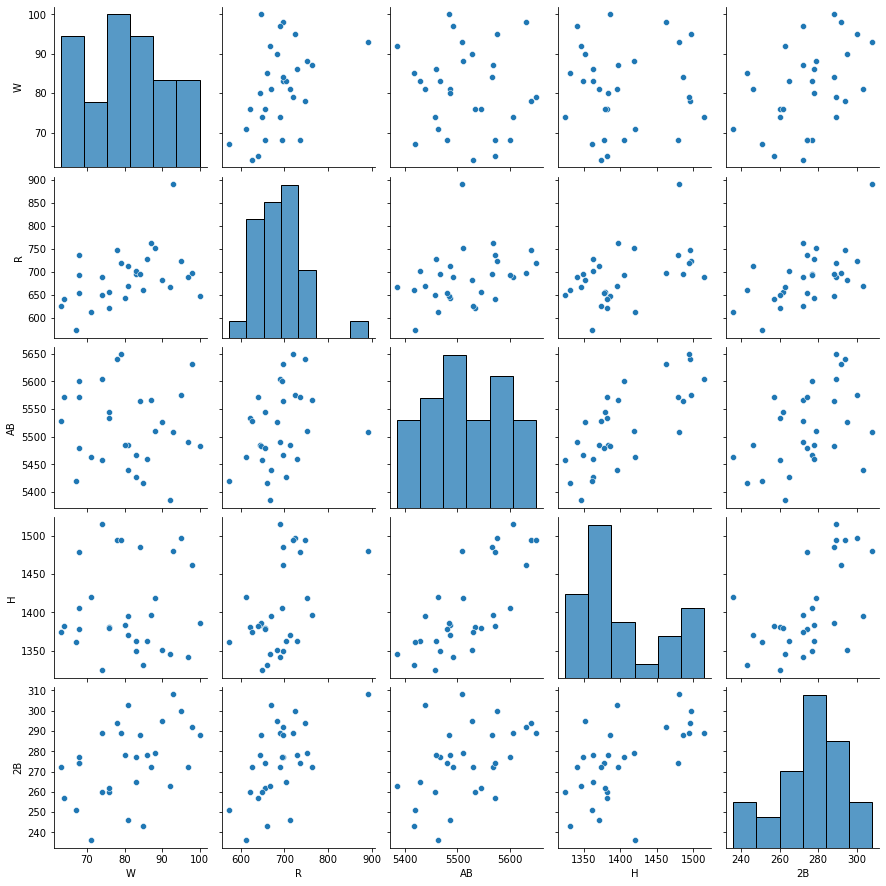

In [250]:
plt.figure(figsize=[16,8])
sns.pairplot(df.iloc[:,0:5])
plt.show()

As there are 17 features if we are plotting pairplot at a single go it would be small is size and difficult to extract insights from small size.

Dividing the pairplot into pair of 5 .

There is a positive linear relationship between AB and 2B feature.
There is a positive linear relationship between H and 2B feature.
There is a positive linear relationship between W and 2B feature.
There is a positive linear relationship between 2B and R
There is a positive linear relationship between H and R
There is a positive linear relationship between H and AB.


In [251]:
df1=df.copy()

# Treating  outliers

There are outliers present in features R, ERA,SHO,SV and E.

In [334]:
df7=df.copy()

In [335]:
Q1=df7['R'].quantile(0.25)
Q3=df7['R'].quantile(0.75)
IQR=Q3-Q1
lower_boundary=Q1-1.5*IQR
upper_boundary=Q3+1.5*IQR
df7['R']=df7['R'].astype('float')
df7['R'].values[df7['R']>upper_boundary]=np.nan

In [336]:
df7['R']=df7['R'].fillna(df7['R'].mean())

In [337]:
Q12=df7['ERA'].quantile(0.25)
Q32=df7['ERA'].quantile(0.75)
IQR1=Q32-Q12
lower_boundary1=Q12-1.5*IQR1
upper_boundary1=Q32+1.5*IQR1
df7['ERA'].values[df7['ERA']>upper_boundary1]=np.nan

In [338]:
df7['ERA']=df7['ERA'].fillna(df7['ERA'].mean())

In [339]:
Q123=df7['SHO'].quantile(0.25)
Q322=df7['SHO'].quantile(0.75)
IQR2=Q322-Q123
lower_boundary2=Q123-1.5*IQR2
upper_boundary2=Q322+1.5*IQR2
df7['SHO']=df7['SHO'].astype('float')
df7['SHO'].values[df7['SHO']>upper_boundary2]=np.nan

In [340]:
df7['SHO']=df7['SHO'].fillna(df7['SHO'].mean())

In [341]:
Q1234=df7['SV'].quantile(0.25)
Q3222=df7['SV'].quantile(0.75)
IQR3=Q3222-Q1234
lower_boundary3=Q1234-1.5*IQR3
upper_boundary3=Q3222+1.5*IQR3
df7['SV']=df7['SV'].astype('float')
df7['SV'].values[df7['SV']>upper_boundary3]=np.nan

In [342]:
df7['SV']=df7['SV'].fillna(df7['SV'].mean())

In [343]:
Q12345=df7['E'].quantile(0.25)
Q32222=df7['E'].quantile(0.75)
IQR4=Q32222-Q12345
lower_boundary4=Q12345-1.5*IQR4
upper_boundary4=Q32222+1.5*IQR4
df7['E']=df7['E'].astype('float')
df7['E'].values[df7['E']>upper_boundary4]=np.nan

In [344]:
df7['E']=df7['E'].fillna(df7['E'].mean())

In [345]:
df7.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

I have used IQR method to remove outliers instead of zscore. Further,zscore could have been used but it will result in loss of data whiich is not acceptable in such a small dataset.

Treating the nan values with the mean of the respective features.

# Treating Skewness

In [346]:
df7.skew()

W      0.047089
R     -0.218636
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA   -0.333816
CG     0.736845
SHO   -0.163828
SV     0.502491
E      0.375229
dtype: float64

Skewness greater than 0.55 is not accepted so will treat those features having skewness greater than 0.5 using power_transform, sqrt method.

In [349]:
from sklearn.preprocessing import power_transform

In [350]:
df7['CG']=power_transform(df7['CG'].values.reshape(-1,1))

In [351]:
df7.skew()

W      0.047089
R     -0.218636
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA   -0.333816
CG    -0.059785
SHO   -0.163828
SV     0.502491
E      0.375229
dtype: float64

In [354]:
df7['H']=np.cbrt(df7['H'].values.reshape(-1,1))
df6=df7.copy()

In [353]:
df7.skew()

W      0.047089
R     -0.218636
AB     0.183437
H      0.642599
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA   -0.333816
CG    -0.059785
SHO   -0.163828
SV     0.502491
E      0.375229
dtype: float64

# Skewness is treated

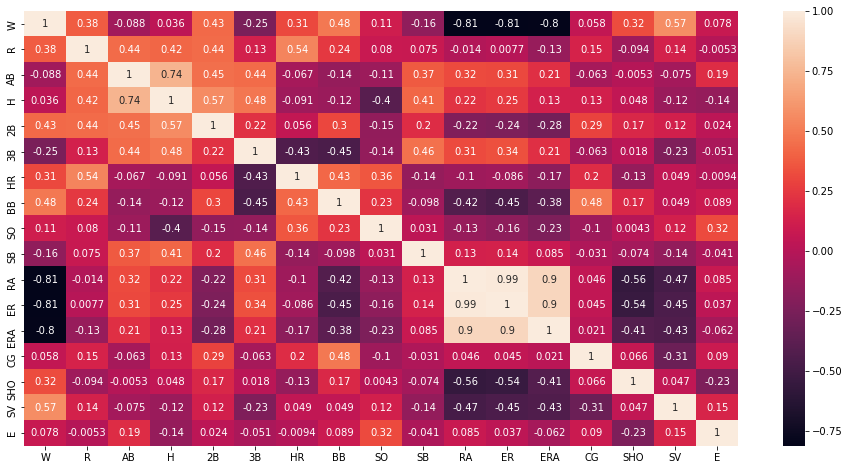

In [272]:
plt.figure(figsize=[16,8])
sns.heatmap(df6.corr(),annot=True)
plt.show()

As per the correlation chart there is very less correlation of feature W(output) with features AB,H,CG and E it can be removed. Further,it can be removed but removing the feature based on correlation should be the last option. The skewness for H is still higher but i am not removing it as i am applying PCA. Further, applying power_transform on H feature i am getting correlation as 0 but i don't want to drop the H feature.

I am not removing any of the features based on the correlation values.

In [355]:
x=df7.drop('W',axis=1)
y=df7['W']

# Applying Standard Scaler to the input features.

In [356]:
se=StandardScaler()
x=se.fit_transform(x)

# Applying PCA as no of features are more so it is case of curse of dimensionality and there are mutilple colinear features there in the dataset.

In [357]:
from sklearn.decomposition import PCA

In [358]:
testpca=PCA()
X=testpca.fit(x)

In [359]:
varcum=np.cumsum(X.explained_variance_ratio_)*100

In [360]:
varcum

array([ 26.63464503,  44.90197975,  58.13434585,  68.00542945,
        75.34960955,  81.75746964,  86.30526779,  89.84214554,
        92.43787992,  94.7858519 ,  96.63282811,  97.91664965,
        98.86062231,  99.57946749,  99.97901819, 100.        ])

if we retain only on feature 27% of data is recovered and rest is lost.Further, if we consider two features only then 45 % of the data is recovered and rest is lost and so on.
The threshold of 95% has beeen applied with says 95 % of the data is recovered with 10 features.

In [361]:
k=np.argmax(varcum>95)
print("number of components explaining 95% variance:",k)

number of components explaining 95% variance: 10


In [362]:
finalpca=PCA(n_components=10)
X1=finalpca.fit_transform(x)

In [363]:
X1.shape

(30, 10)

In [364]:
x.shape

(30, 16)

Before applying PCA there were 16 features and after applying PCA it is converted to 10 features.

In [365]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.15,random_state=48)

In [366]:
le=LinearRegression()
le.fit(X1_train,y_train)
pred=le.predict(X1_test)
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

2.781832438732225
9.102998725239223
3.017117618728051
0.8656582242438131


In [367]:
dt=DecisionTreeRegressor()
dt.fit(X1_train,y_train)
pred1=dt.predict(X1_test)
print(mean_absolute_error(y_test,pred1))
print(mean_squared_error(y_test,pred1))
print(np.sqrt(mean_squared_error(y_test,pred1)))
print(r2_score(y_test,pred1))

7.8
65.4
8.087026647662292
0.03482880755608031


In [368]:
svr=SVR()
svr.fit(X1_train,y_train)
pred2=svr.predict(X1_test)
print(mean_absolute_error(y_test,pred2))
print(mean_squared_error(y_test,pred2))
print(np.sqrt(mean_squared_error(y_test,pred2)))
print(r2_score(y_test,pred2))

7.1501299602789485
74.88016314722852
8.653332487962572
-0.1050791491621681


In [369]:
kvr=KNeighborsRegressor()
kvr.fit(X1_train,y_train)
pred3=kvr.predict(X1_test)
print(mean_absolute_error(y_test,pred3))
print(mean_squared_error(y_test,pred3))
print(np.sqrt(mean_squared_error(y_test,pred3)))
print(r2_score(y_test,pred3))

5.040000000000004
31.45600000000004
5.608564878825958
0.5357733175914988


In [288]:
ada=AdaBoostRegressor()
ada.fit(X1_train,y_train)
pred4=ada.predict(X1_test)
print(mean_absolute_error(y_test,pred4))
print(mean_squared_error(y_test,pred4))
print(np.sqrt(mean_squared_error(y_test,pred4)))
print(r2_score(y_test,pred4))

4.780000000000001
34.80200000000001
5.899321994941453
0.4863931523022432


In [370]:
gr=GradientBoostingRegressor()
gr.fit(X1_train,y_train)
pred5=gr.predict(X1_test)
print(mean_absolute_error(y_test,pred5))
print(mean_squared_error(y_test,pred5))
print(np.sqrt(mean_squared_error(y_test,pred5)))
print(r2_score(y_test,pred5))


3.643634476682692
18.2240569325982
4.268964386428891
0.7310499272048672


In [290]:
from sklearn.ensemble import RandomForestRegressor

In [371]:
rfc=RandomForestRegressor()
rfc.fit(X1_train,y_train)
pred6=rfc.predict(X1_test)
print(mean_absolute_error(y_test,pred6))
print(mean_squared_error(y_test,pred6))
print(np.sqrt(mean_squared_error(y_test,pred6)))
print(r2_score(y_test,pred6))

4.336000000000001
33.22476000000002
5.764092296277013
0.5096700118063753


# Checking out the cross_val_score for all the models

In [372]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(le,X1,y,cv=5)
print(score.mean())

0.2640582980660086


In [373]:
from sklearn.model_selection import cross_val_score
score1=cross_val_score(dt,X1,y,cv=5)
print(score1.mean())

-1.7187744231096638


In [374]:
score2=cross_val_score(svr,X1,y,cv=5)
print(score2.mean())

-0.36417549662321463


In [375]:
score3=cross_val_score(kvr,X1,y,cv=5)
print(score3.mean())

-0.1152676270354801


In [376]:
score4=cross_val_score(ada,X1,y,cv=5)
print(score4.mean())

-0.23654231616247134


In [377]:
score5=cross_val_score(gr,X1,y,cv=5)
print(score5.mean())

-0.47284357364759816


In [378]:
score6=cross_val_score(rfc,X1,y,cv=5)
print(score6.mean())

-0.2037308342880005


The cross_val_score of all the models tested except linear regression are negative. Further, Linear Regression is my best model till now. I will apply regulization techniques to check underfitting and overfitting issue and then decide best model.

In [379]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.001)
ls.fit(X1_train,y_train)
pred7=ls.predict(X1_test)
print(mean_absolute_error(y_test,pred7))
print(mean_squared_error(y_test,pred7))
print(np.sqrt(mean_squared_error(y_test,pred7)))
print(r2_score(y_test,pred7))


2.7809834868027563
9.091421179906058
3.015198364934894
0.865829085302449


In [300]:
score7=cross_val_score(ls,X1,y,cv=5)
print(score7.mean())


0.264429677950282


In [380]:
from sklearn.linear_model import Ridge
rd=Ridge(alpha=0.001)
rd.fit(X1_train,y_train)
pred8=rd.predict(X1_test)
print(mean_absolute_error(y_test,pred8))
print(mean_squared_error(y_test,pred8))
print(np.sqrt(mean_squared_error(y_test,pred8)))
print(r2_score(y_test,pred8))

2.781715421424579
9.101963244219238
3.016946012811505
0.8656735058409204


In [381]:
score8=cross_val_score(rd,X1,y,cv=5)
print(score8.mean())


0.2640884489654135


# All the three models Linear Regression, Lasso Regression and ridge regression are having the same accuracy score. Further, hyper tunings of the parameter is to be done.

In [382]:
from sklearn.model_selection import RandomizedSearchCV

# Hypertuning for Linear Regression

In [383]:
params={'fit_intercept':['True','False']}

In [384]:
rsc=RandomizedSearchCV(le,param_distributions=params,n_jobs=-1,cv=5)
rsc.fit(X1_train,y_train)
rsc.best_params_

{'fit_intercept': 'True'}

In [385]:
le=LinearRegression(fit_intercept=True)
le.fit(X1_train,y_train)
pred9=le.predict(X1_test)
print(mean_absolute_error(y_test,pred9))
print(mean_squared_error(y_test,pred9))
print(np.sqrt(mean_squared_error(y_test,pred9)))
print(r2_score(y_test,pred9))
                    

2.781832438732225
9.102998725239223
3.017117618728051
0.8656582242438131


In [386]:
lasso_params={'alpha':[0.1, 0.01, 0.001, 0.0001,1]}

In [387]:
rsc1=RandomizedSearchCV(ls,param_distributions=lasso_params,n_jobs=-1,cv=5)
rsc1.fit(X1_train,y_train)
rsc1.best_params_

{'alpha': 1}

In [388]:
ls1=Lasso(alpha=1)
ls1.fit(X1_train,y_train)
pred10=ls1.predict(X1_test)
print(mean_absolute_error(y_test,pred10))
print(mean_squared_error(y_test,pred10))
print(np.sqrt(mean_squared_error(y_test,pred10)))
print(r2_score(y_test,pred10))
                    


2.664282615889661
9.056215637118946
3.0093546878224484
0.8663486476222115


In [310]:
ridge_params={'alpha':[0.1,0.01,0.001,0.0001,1],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [389]:
rsc2=RandomizedSearchCV(rd,param_distributions=ridge_params,n_jobs=-1,cv=5)
rsc2.fit(X1_train,y_train)
rsc2.best_params_

{'solver': 'svd', 'alpha': 1}

In [391]:
rd1=Ridge(alpha=1,solver='svd')
rd1.fit(X1_train,y_train)
pred11=rd1.predict(X1_test)
print(mean_absolute_error(y_test,pred11))
print(mean_squared_error(y_test,pred11))
print(np.sqrt(mean_squared_error(y_test,pred11)))
print(r2_score(y_test,pred11))

2.6740381324453724
8.2998838539017
2.8809519006574376
0.8775105688621354


# The r2 score of all the three models are same. Further Ridge is my best model with r2score of 87%

Text(0.5, 1.0, 'Ridge Regression')

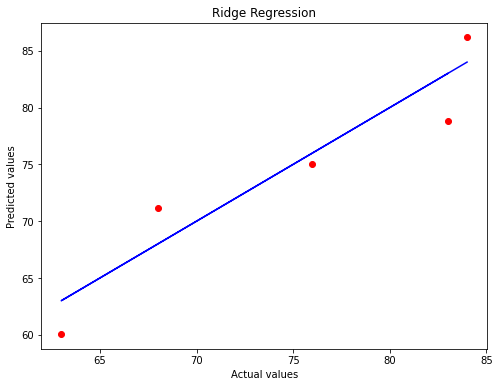

In [392]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred11,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Ridge Regression")

In [393]:
import joblib

In [394]:
joblib.dump(rd1,'baseballstudy.obj')

['baseballstudy.obj']

In [395]:
joblib.load('baseballstudy.obj')

Ridge(alpha=1, solver='svd')